# Andrew Toner

# Overview

Does the weather affect the "tone" of twitter.  Are people more positive, or negative based on the weather, or at least does the mood change if the weather is outside of its seasonal norms.

Looking at the tweets from Seattle, New York, Manchester UK, and Sydney Austrilia is there any link between the weather and the twitter mood?

All the code can be found on GitHub
* https://github.com/AToner/UW_DATASCI410 
* git@github.com:AToner/UW_DATASCI410.git

# Data collection process

1. Raw data was collected from twitter for approximatley one month.  This generated raw text files (a file for each hour) for all the tweets in the given boundary areas (Seattle, New York, Manchester UK, and Sydney Australia).
1. Raw data was scrubbed to remove elements we weren't interested in and to ensure that the location information was within the boundaries we had defined.  Around 50% of the raw feed was dropped at this point.
1. The scrubbed files were then checked for senitment using AWS' Comprehend service. https://docs.aws.amazon.com/comprehend/latest/dg/API_DetectSentiment.html    
1. Weather information was added next.  Taking the weather at the time and location of the tweet and the monthly average.


## Raw twitter gathering (get_twitter_feed.py)

Result.  One of these records per tweet 

```
{"created_at": "Mon Jan 22 02:57:12 +0000 2018", "id": 955273110248394754, "id_str": "955273110248394754", "text": "On the Clintons: \u201cMore horrifying than I could have imagined.\u201d https://t.co/DgX7N54lEh", "display_text_range": [0, 62], "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 109068217, "id_str": "109068217", "name": "Loud Citizen", "screen_name": "LoudCitizen", "location": "New York, NY", "url": "http://www.loudcitizen.org", "description": "[[Free Speech backup account: @LoudCitizen on GAB.ai.]] Opinions, commentary, scathing wit, memes, graphics and absurdism by SWCCM Loud Citizen.", "translator_type": "none", "protected": false, "verified": false, "followers_count": 310, "friends_count": 224, "listed_count": 14, "favourites_count": 1226, "statuses_count": 9510, "created_at": "Wed Jan 27 21:51:46 +0000 2010", "utc_offset": -18000, "time_zone": "Eastern Time (US & Canada)", "geo_enabled": true, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://pbs.twimg.com/profile_background_images/71409301/loudcitizen-fullscreenshot-twitterbackground.PNG", "profile_background_image_url_https": "https://pbs.twimg.com/profile_background_images/71409301/loudcitizen-fullscreenshot-twitterbackground.PNG", "profile_background_tile": false, "profile_link_color": "1B95E0", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/662626762/loudcitizen-sidebarlogo_normal.PNG", "profile_image_url_https": "https://pbs.twimg.com/profile_images/662626762/loudcitizen-sidebarlogo_normal.PNG", "profile_banner_url": "https://pbs.twimg.com/profile_banners/109068217/1465882790", "default_profile": false, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": {"id": "01a9a39529b27f36", "url": "https://api.twitter.com/1.1/geo/id/01a9a39529b27f36.json", "place_type": "city", "name": "Manhattan", "full_name": "Manhattan, NY", "country_code": "US", "country": "United States", "bounding_box": {"type": "Polygon", "coordinates": [[[-74.026675, 40.683935], [-74.026675, 40.877483], [-73.910408, 40.877483], [-73.910408, 40.683935]]]}, "attributes": {}}, "contributors": null, "quoted_status_id": 955271080066895872, "quoted_status_id_str": "955271080066895872", "quoted_status": {"created_at": "Mon Jan 22 02:49:08 +0000 2018", "id": 955271080066895872, "id_str": "955271080066895872", "text": "Coming up \"The panel and Ann Coulter weigh in on the CLINTONS\"\n\ud83d\ude0e\ud83d\udcfa \nFoxNewsChannel", "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>", "truncated": false, "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3292463759, "id_str": "3292463759", "name": "Anntensity", "screen_name": "anntensity", "location": "Coulterville, USA", "url": null, "description": "Ann Coulter is jaw dropping gorgeous. Face the facts & join us. This is a FAN page. Yes, we are occasionally RT'd by @AnnCoulter!! #DeplorableAnntensity", "translator_type": "none", "protected": false, "verified": false, "followers_count": 12053, "friends_count": 2807, "listed_count": 89, "favourites_count": 62972, "statuses_count": 20992, "created_at": "Thu May 21 04:58:53 +0000 2015", "utc_offset": -28800, "time_zone": "Pacific Time (US & Canada)", "geo_enabled": false, "lang": "en", "contributors_enabled": false, "is_translator": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "profile_image_url": "http://pbs.twimg.com/profile_images/675700115143860224/HVV8nG2i_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/675700115143860224/HVV8nG2i_normal.jpg", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3292463759/1516163461", "default_profile": true, "default_profile_image": false, "following": null, "follow_request_sent": null, "notifications": null}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "quote_count": 2, "reply_count": 2, "retweet_count": 0, "favorite_count": 9, "entities": {"hashtags": [], "urls": [], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "filter_level": "low", "lang": "en"}, "is_quote_status": true, "quote_count": 0, "reply_count": 0, "retweet_count": 0, "favorite_count": 0, "entities": {"hashtags": [], "urls": [{"url": "https://t.co/DgX7N54lEh", "expanded_url": "https://twitter.com/anntensity/status/955271080066895872", "display_url": "twitter.com/anntensity/sta\u2026", "indices": [63, 86]}], "user_mentions": [], "symbols": []}, "favorited": false, "retweeted": false, "possibly_sensitive": false, "filter_level": "low", "lang": "en", "timestamp_ms": "1516589832256"}
```

## Clean up the raw files (scrub_twitter_file.py)

```
{"id": 955273110248394754, "time": "Mon Jan 22 02:57:12 +0000 2018", "location": [-73.9685415, 40.780709], "location_name": "New York", "user_name": "LoudCitizen", "text": "On the Clintons: \u201cMore horrifying than I could have imagined.\u201d https://t.co/DgX7N54lEh"}
```

## Get the intent of the tweet (get_tweet_intent.py)

```
{"id": 955273110248394754, "time": "Mon Jan 22 02:57:12 +0000 2018", "location": [-73.9685415, 40.780709], "location_name": "New York", "user_name": "LoudCitizen", "text": "On the Clintons: \u201cMore horrifying than I could have imagined.\u201d https://t.co/DgX7N54lEh", "SentimentMixed": 0.011367536149919033, "SentimentNegative": 0.1393040120601654, "SentimentNeutral": 0.8337394595146179, "SentimentPositive": 0.015588928014039993}
```

## Get the weather at the time of the tweet (get_weather.py)

```
{"id": 968101536105664513, "time": "Mon Feb 26 12:32:47 +0000 2018", "location": [-74.0007613, 40.7207559], "location_name": "New York", "user_name": "HaikuReview2015", "text": "Paul Rodgers - Now  https://t.co/wtHGUi8KCp", "SentimentMixed": 0.0012351124314591289, "SentimentNegative": 0.013657634146511555, "SentimentNeutral": 0.9691357016563416, "SentimentPositive": 0.015971550717949867, "temp": 46.0, "humidity": 71.0, "conditions": "Overcast", "fog": false, "rain": false, "snow": false, "hail": false, "thunder": false, "tornado": false, "average_temp": 32.9}
```


# Outputs

Files available at http://andytoner.com/DATASCI410/ containing the data at various steps.  Note the large size of the raw files (~17GB).

tweets_weather.json contains the final output with 2,336,596 tweets. Smaller files created from the complete data are available (e.g. 100000_tweets_weather).  These were created with the "shuf" command to take a sample of the full tweet_weather.json file rather than just the head or tail.

```
  613039327 1000000_tweets_weather.json
   61299070 100000_tweets_weather.json
  306475838 500000_tweets_weather.json
 1432256429 2336596_tweets_weather.json
 1018399369 tweets_intent.json
  289845367 tweets_intent.tar.gz
 2449990167 tweets_raw.tar.gz
17325902983 tweets_raw.txt
  633954258 tweets_scrubbed.json
  173613077 tweets_scrubbed.tar.gz
  303017590 tweets_weather.tar.gz
```


# Analysis


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
%matplotlib inline

In [2]:
# Load data
filename = '100000_tweets_weather.json'
#filename = '500000_tweets_weather.json'
#filename = '1000000_tweets_weather.json'
#filename = '2336596_tweets_weather.json'
tweets = pd.read_json(filename, lines=True, orient='records')

# Prepare the data
* Drop any rows with NA data
* Set the right data types
* Add a column that is a datetime representation of the tweet's time
* Add a column for the temperature difference from mean
* Sort the data and set the index and column to the datetime


In [3]:
tweets = tweets.dropna()

tweets['average_temp'] = tweets['average_temp'].astype(float)
tweets['fog'] = tweets['fog'].astype(bool)
tweets['hail'] = tweets['hail'].astype(bool)
tweets['rain'] = tweets['rain'].astype(bool)
tweets['snow'] = tweets['snow'].astype(bool)
tweets['thunder'] = tweets['thunder'].astype(bool)
tweets['tornado'] = tweets['tornado'].astype(bool)

tweets['datetime'] = pd.to_datetime(tweets['time'])
tweets['delta_temp'] = tweets['temp'] - tweets['average_temp']

tweets = tweets.sort_values('datetime', ascending=True)
tweets = tweets.set_index('datetime')
tweets['datetime']=tweets.index

# Working out sentiment

The sentiment comes back from Amazon as 

```
{ "SentimentMixed": 0.0012351124314591289, "SentimentNegative": 0.013657634146511555, "SentimentNeutral": 0.9691357016563416, "SentimentPositive": 0.015971550717949867 }
```

To get some composite score see which is the biggest out of Postive, Negative, or Mixed, then assign a number to it (0 for neg, .5 for mixed, 1 for positive) and add that column.

In [4]:
tweets['WinningSentiment'] = tweets[['SentimentMixed', 'SentimentPositive', 'SentimentNegative']].idxmax(axis=1)

tweets['SentimentValue'] = 0
tweets['SentimentValue'] = np.where(tweets['WinningSentiment'] == 'SentimentNegative', 0, tweets['SentimentValue'])
tweets['SentimentValue'] = np.where(tweets['WinningSentiment'] == 'SentimentMixed', 0.5, tweets['SentimentValue'])
tweets['SentimentValue'] = np.where(tweets['WinningSentiment'] == 'SentimentPositive', 1, tweets['SentimentValue'])

tweets['IsPositive'] = tweets['WinningSentiment'] == 'SentimentPositive'
tweets['IsNegative'] = tweets['WinningSentiment'] == 'SentimentNegative'
tweets['IsMixed'] = tweets['WinningSentiment'] == 'SentimentMixed'

In [5]:
tweets['SentimentValue'].mean()

0.6527161806907347

In [6]:
positive_tweets = tweets.loc[tweets['SentimentValue'] == 1]
negative_tweets = tweets.loc[tweets['SentimentValue'] == 0]
mixed_tweets = tweets.loc[tweets['SentimentValue'] == 0.5]
total_tweets = len(positive_tweets) + len(negative_tweets) + len(mixed_tweets)
print("Total tweet count = {:d}".format(total_tweets))
print("Positive tweet count = {:d} {:0.2f}%".format(len(positive_tweets), len(positive_tweets) / total_tweets * 100))
print("Negative tweet count = {:d} {:0.2f}%".format(len(negative_tweets), len(negative_tweets) / total_tweets * 100))

Total tweet count = 99662
Positive tweet count = 64797 65.02%
Negative tweet count = 34357 34.47%


It looks like twitter is almost a positive place!!!!!

# Twitter overall

Is there any link between the temperature and the sentiment of tweets.  The lack of hour specific average temperature causes big swings during the day which will hurt the validity of the data.

There's lots of data and graphs look terrible so bringing the sample count down by doing grouping the tweets by hour hourly means and only showing data for a few days.

Give the mix of locales in the data displayed in timeseries is unlikley to be useful.

Start time =  2018-02-21 00:00:00
End time =  2018-03-01 19:00:00


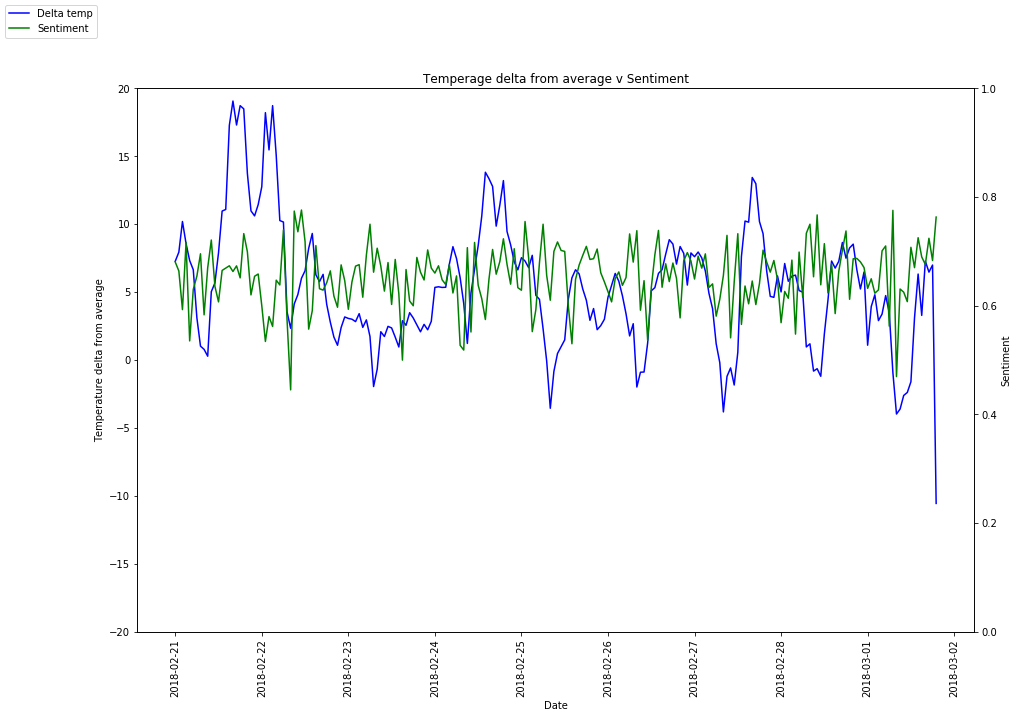

In [7]:
hourly_summary = pd.DataFrame()
hourly_summary['delta_temp'] = tweets['delta_temp'].resample('H').mean()
hourly_summary['SentimentValue'] = tweets['SentimentValue'].resample('H').mean()
hourly_summary['datetime'] = hourly_summary.index
hourly_summary = hourly_summary.truncate(before='2018-02-21')

print("Start time = ", min(hourly_summary['datetime']))
print("End time = ", max(hourly_summary['datetime']))

fig, ax1 = plt.subplots(figsize=(15, 10))

plt.title('Temperage delta from average v Sentiment')
plt.xticks(rotation=90)

ax1.plot(hourly_summary['datetime'], hourly_summary['delta_temp'], label='Delta temp', color='Blue')
ax1.set_ylim([-20,20])
ax1.set_ylabel('Temperature delta from average')
ax1.set_xlabel('Date')

ax2 = ax1.twinx()
ax2.set_ylim([0,1])
ax2.set_ylabel('Sentiment')
ax2.plot(hourly_summary['datetime'], hourly_summary['SentimentValue'], label='Sentiment', color='Green')

fig.legend(loc="upper left")
plt.show()

# Temperature affecting tweets regardless of sentiment

/Users/andrew/.pyenv/versions/3.6.3/envs/UWDataScience/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


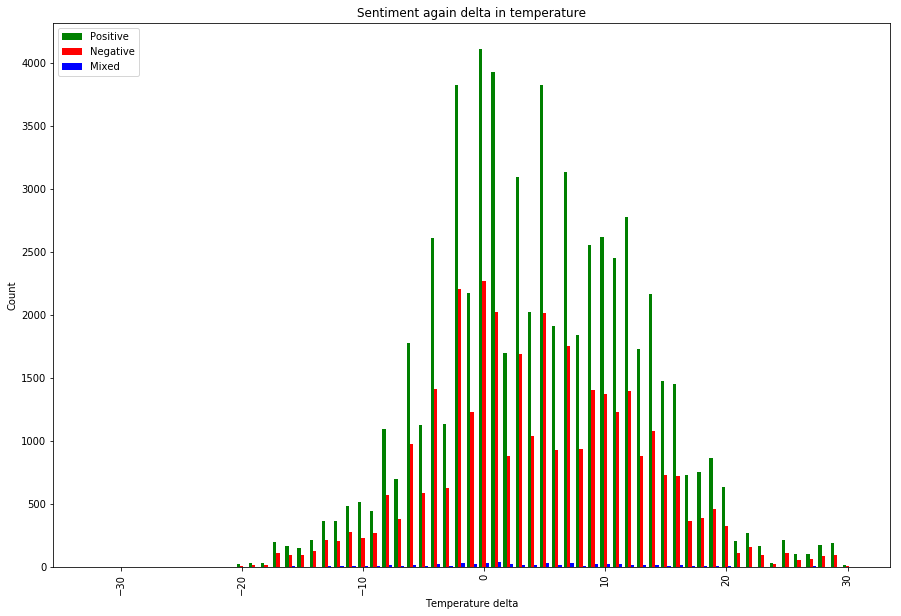

In [8]:
temperature_delta = pd.DataFrame()
temperature_delta['delta_temp'] = tweets['delta_temp']
temperature_delta['SentimentValue'] = tweets['SentimentValue']
temperature_delta = temperature_delta.reset_index(drop=True)

highest_temp = math.ceil(max(temperature_delta['delta_temp']))
lowest_temp = -highest_temp
hist_bins = range(lowest_temp, highest_temp)

positive = temperature_delta[(temperature_delta['SentimentValue'] == 1)]
negative = temperature_delta[(temperature_delta['SentimentValue'] == 0)]
mixed = temperature_delta[(temperature_delta['SentimentValue'] == 0.5)]

plt.figure(figsize=(15,10))
plt.hist([positive['delta_temp'], negative['delta_temp'], mixed['delta_temp']],
         hist_bins, histtype='bar', align='left',
        color=['green', 'red', 'blue'], label=['Positive', 'Negative', 'Mixed'])
plt.xticks(rotation=90)
plt.title('Sentiment again delta in temperature')
plt.ylabel('Count')
plt.xlabel('Temperature delta')
plt.legend(loc="upper left")
plt.show()

Looking at the distribution positive and negative are similar but warmer than average weather appears to mean more tweeting

In [9]:
warm_tweets = tweets.loc[tweets['delta_temp'] > 0]
cold_tweets = tweets.loc[tweets['delta_temp'] <= 0]
total_tweets = len(warm_tweets) + len(cold_tweets)
print("Total tweet count = {:d}".format(total_tweets))
print("Warm tweet count = {:d} {:0.2f}%".format(len(warm_tweets), len(warm_tweets) / total_tweets * 100))
print("Cold tweet count = {:d} {:0.2f}%".format(len(cold_tweets), len(cold_tweets) / total_tweets * 100))

Total tweet count = 99662
Warm tweet count = 70184 70.42%
Cold tweet count = 29478 29.58%


# Going local

In [10]:
seattle_tweets = tweets.loc[tweets['location_name'] == 'Seattle']
ny_tweets = tweets.loc[tweets['location_name'] == 'New York']
manchester_tweets = tweets.loc[tweets['location_name'] == 'Manchester']
sydney_tweets = tweets.loc[tweets['location_name'] == 'Sydney']
total_tweets = len(seattle_tweets) + len(ny_tweets) + len(manchester_tweets) + len(sydney_tweets)
print("Total tweet count = {:d}".format(total_tweets))
print("Seattle tweet count = {:d} {:0.2f}%".format(len(seattle_tweets), len(seattle_tweets) / total_tweets * 100))
print("NY tweet count = {:d} {:0.2f}%".format(len(ny_tweets), len(ny_tweets) / total_tweets * 100))
print("Manchester tweet count = {:d} {:0.2f}%".format(len(manchester_tweets), len(manchester_tweets) / total_tweets * 100))
print("Sydney tweet count = {:d} {:0.2f}%".format(len(sydney_tweets), len(sydney_tweets) / total_tweets * 100))


Total tweet count = 99662
Seattle tweet count = 10835 10.87%
NY tweet count = 58480 58.68%
Manchester tweet count = 15401 15.45%
Sydney tweet count = 14946 15.00%


NY Appears to be the most chatty and Seattle the least chatty

# Local Weather

In [11]:
seattle_weather = seattle_tweets[['datetime', 'temp', 'average_temp', 'delta_temp', 'SentimentValue']]
ny_weather = ny_tweets[['datetime', 'temp', 'average_temp', 'delta_temp', 'SentimentValue']]
manchester_weather = manchester_tweets[['datetime', 'temp', 'average_temp', 'delta_temp', 'SentimentValue']]
sydney_weather = sydney_tweets[['datetime', 'temp', 'average_temp', 'delta_temp', 'SentimentValue']]

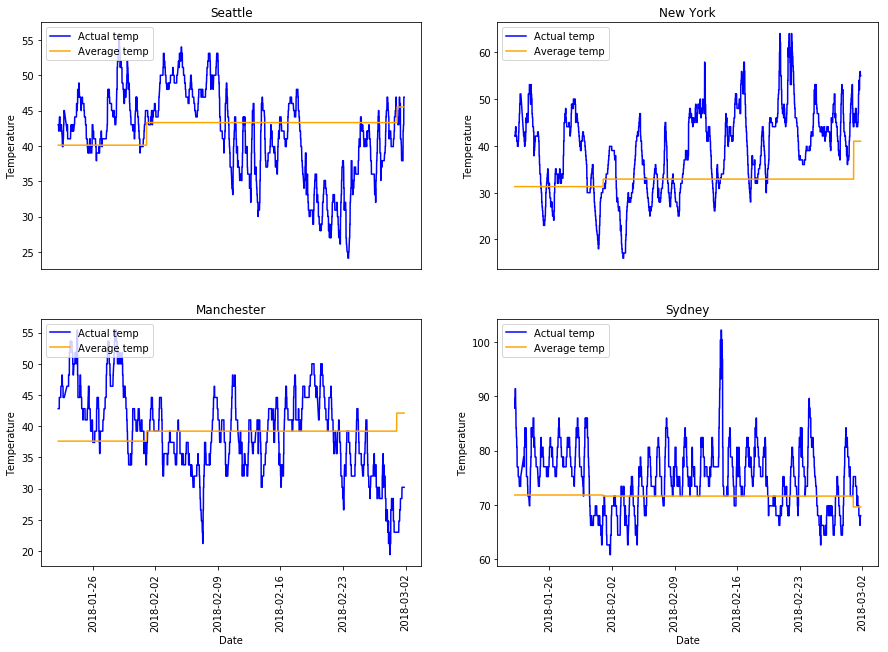

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('Seattle')
plt.plot(seattle_weather['datetime'], seattle_weather['temp'], label='Actual temp', color='Blue')
plt.plot(seattle_weather['datetime'], seattle_weather['average_temp'], label='Average temp', color='Orange')
plt.ylabel('Temperature')
plt.xticks([])
plt.legend(loc="upper left")

plt.subplot(222)
plt.title('New York')
plt.plot(ny_weather['datetime'], ny_weather['temp'], label='Actual temp', color='Blue')
plt.plot(ny_weather['datetime'], ny_weather['average_temp'], label='Average temp', color='Orange')
plt.ylabel('Temperature')
plt.xticks([])
plt.legend(loc="upper left")

plt.subplot(223)
plt.title('Manchester')
plt.xticks(rotation=90)
plt.plot(manchester_weather['datetime'], manchester_weather['temp'], label='Actual temp', color='Blue')
plt.plot(manchester_weather['datetime'], manchester_weather['average_temp'], label='Average temp', color='Orange')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.legend(loc="upper left")

plt.subplot(224)
plt.title('Sydney')
plt.xticks(rotation=90)
plt.plot(sydney_weather['datetime'], sydney_weather['temp'], label='Actual temp', color='Blue')
plt.plot(sydney_weather['datetime'], sydney_weather['average_temp'], label='Average temp', color='Orange')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.legend(loc="upper left")

plt.show()

# Warm and chatty.  Cool and Quiet

The weather graphs look like NY had some warmer than average weather and Seattle cooler.  Is that true?

We've seen that warmer weather gives more tweets and NY warmer than average and the chattiest group with Seattle being cooler than average and having the fewest tweets.

In [13]:
print("Seattle mean difference from seasonal temp {:0.2f}".format(seattle_tweets['delta_temp'].mean()))
print("NY mean difference from seasonal temp {:0.2f}".format(ny_tweets['delta_temp'].mean()))
print("Manchester mean difference from seasonal temp {:0.2f}".format(manchester_tweets['delta_temp'].mean()))
print("Sydney mean difference from seasonal temp {:0.2f}".format(sydney_tweets['delta_temp'].mean()))


Seattle mean difference from seasonal temp -0.15
NY mean difference from seasonal temp 7.38
Manchester mean difference from seasonal temp 0.51
Sydney mean difference from seasonal temp 4.08


# Try a regression to prodict a positive tweet from the weather

In [14]:
tweets_df = pd.DataFrame(tweets)

X_cols = ['temp', 'average_temp']
X = tweets[X_cols]
Y = tweets['IsPositive']

logit_model = sm.Logit(Y, X)

result = logit_model.fit()


Optimization terminated successfully.
         Current function value: 0.653224
         Iterations 4


In [15]:
def accuracy_metrics(actual, predicted):
    """ Calculate the accuracy metrics from arrays of actual and predicted results
    """
    if len(actual) != len(predicted):
        raise Exception('Size of predicted and actual arrays differ')

    # Step through the arrays and calculate true positive, false negative, false positive, true negative
    tp = tn = fp = fn = 0

    for ix, actual_value in enumerate(actual):
        predicted_value = predicted[ix]

        if actual_value:
            if predicted_value:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_value:
                fp += 1
            else:
                tn += 1

    # use the result above to calculate the stats and create the matrix.
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    confusion = [[tn, fp], [fn, tp]]

    return precision, recall, accuracy, confusion

def prediction_fun(row):
    if row['probability'] > 0.5:
        return 1.0
    else:
        return 0.0

# Create a frame with actual v predicted
prediction_frame = X.copy()
prediction_frame['probability'] = result.predict(X)
prediction_frame['actual'] = Y    
prediction_frame['prediction'] = prediction_frame.apply(prediction_fun, axis=1)

# Get the metrics for it.
accuracy, recall, precision, confusion = accuracy_metrics(prediction_frame['actual'],prediction_frame['prediction'])

print('Accuracy : {}'.format(accuracy))
print('Precision : {}'.format(precision))
print('Recall : {}'.format(recall))
print('Confusion : {}'.format(confusion))


Accuracy : 0.6501675663743453
Precision : 0.6501675663743453
Recall : 1.0
Confusion : [[0, 34865], [0, 64797]]


Given the results it's better than 50% accurate but not good enough to trust.

The recall of 1.0 and the 0 entries in the confusion matrix shows we don't predict negative tweets.

# Things to think about

* Not having hour specific average temperatures causes issues.  The single average data point per day causes big swings in the delta temperature.  Finding a source of hour by hour average tenmperate would remove the wave of delta_temp.

* Adding more features to the regression (rain, cloud, thunder, etc.) would be useful too.